In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
base=automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
station = base.classes.station
measurement = base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).\
    order_by(measurement.date.desc()).first()

print(most_recent_date)

('2017-08-23',)


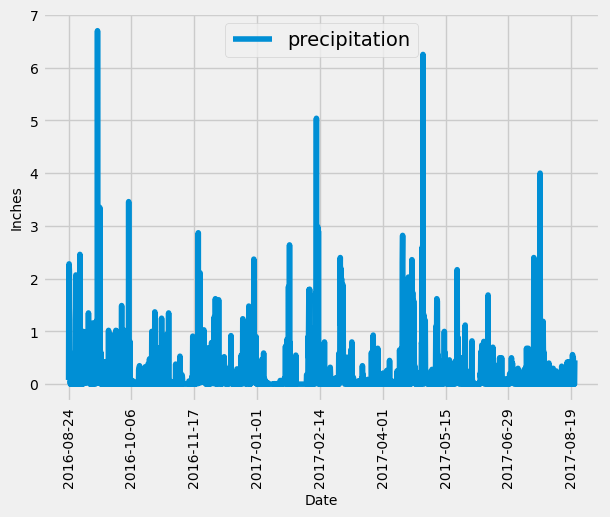

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

precip_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= '2016-08-24').\
    filter(measurement.date <= "2017-08-23").all()

# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip_data).set_index("date")

# Sort the dataframe by date

precip_df= precip_df.rename(columns={'prcp':'precipitation'})
precip_df = precip_df.sort_values(by='date').dropna()


# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(rot=90)
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Inches', fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
# plt.columns(fontsize = 10)
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
total_number_stations= session.query(station.station).count()
total_number_stations

9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station,func.count(measurement.station)).\
    order_by(func.count(measurement.station).desc()).\
    group_by(measurement.station).all() 

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active_station = session.query(measurement.station,func.count(measurement.station)).\
    order_by(func.count(measurement.station).desc()).\
    group_by(measurement.station).first()

most_active_station_number = most_active_station[0]
most_active_station_number 

low_temperature = session.query(func.min(measurement.tobs)).\
  filter(measurement.station==most_active_station_number).all()
print(low_temperature) 

high_temperature = session.query(func.max(measurement.tobs)).\
  filter(measurement.station==most_active_station_number).all()

print(high_temperature)

avg_temperature = session.query(func.avg(measurement.tobs)).\
    filter(measurement.station==most_active_station_number).all()

print(avg_temperature)

[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


Text(0, 0.5, 'Frequency')

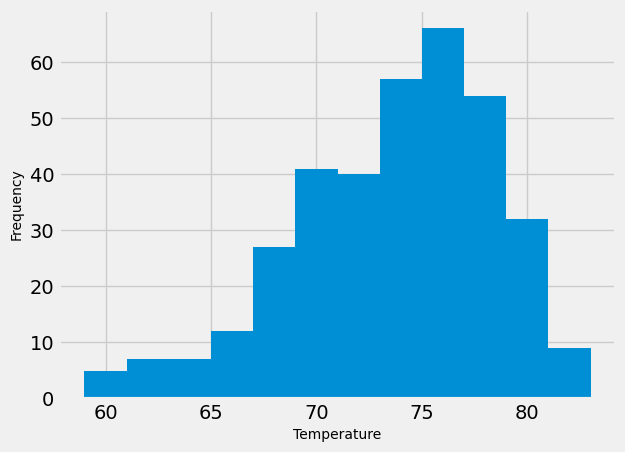

In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
recent_station = session.query(measurement.date,measurement.tobs).\
    filter(measurement.station == most_active_station_number).\
    order_by(measurement.date.desc()).first()

twelve_months = session.query(measurement.date,measurement.tobs).\
    filter(measurement.station == most_active_station_number).\
    filter(measurement.date > '2016-08-17').all()

twelve_months_df = pd.DataFrame(twelve_months)["tobs"]
twelve_months_df 

hist = twelve_months_df.hist(bins=12) 
plt.xlabel('Temperature', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)

# Close Session

In [17]:
# Close Session
session.close()